<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-04-09 07:32:34--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.6MB/s    in 4.0s    

2024-04-09 07:32:38 (16.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./cats_and_dogs_filtered.zip','r')
zip_ref.extractall('tmp/')
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

# Directory with training cats pictures
train_cats_dir = os.path.join(train_dir,'cats')

# Directory with training dogs pictures
train_dogs_dir = os.path.join(train_dir,'dogs')

# Directory with validation cats pictures
validation_cats_dir = os.path.join(validation_dir,'cats')

# Directory with validation dogs pictures
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  # Creates CNN with 4 convolutional layers
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

  model.compile(loss = 'binary_crossentropy',
                optimizer = RMSprop(learning_rate = 1e-4),
                metrics = ['accuracy'])

  return model


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def DataGenerator(DataAugmentation = False):

  if DataAugmentation == False:
    train_datagen = ImageDataGenerator(rescale = 1./255)

  else:
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
    )

  test_datagen = ImageDataGenerator(rescale = 1./255)

  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size = (150,150),
      batch_size = 20,
      class_mode = 'binary'
  )

  validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size= (150,150),
      batch_size = 20,
      class_mode = 'binary'
  )

  return train_generator,validation_generator

In [6]:
def train_model(epochs,data_augmentation=False):
    # Create a new model
    model = create_model()
    train_generator,validation_generator = DataGenerator(data_augmentation)
    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch = 100, # 2000 images = batch_size * steps
        epochs = epochs,
        validation_data = validation_generator,
        validation_steps = 50, # 1000 images = batch_size * steps
        verbose = 2
    )

    return history

In [7]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  # Plot the training and validation loss and accuracy
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  # Plot the training and validation accuracy
  plt.plot(epochs,acc,'bo',label = 'Training accuracy')
  plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.figure()

  # Plot the training and validation loss
  plt.plot(epochs,acc,'bo',label = 'Training accuracy')
  plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 11s - loss: 0.6892 - accuracy: 0.5260 - val_loss: 0.6781 - val_accuracy: 0.6060 - 11s/epoch - 108ms/step
Epoch 2/20
100/100 - 5s - loss: 0.6752 - accuracy: 0.5620 - val_loss: 0.6584 - val_accuracy: 0.6150 - 5s/epoch - 50ms/step
Epoch 3/20
100/100 - 5s - loss: 0.6587 - accuracy: 0.6035 - val_loss: 0.6455 - val_accuracy: 0.6290 - 5s/epoch - 46ms/step
Epoch 4/20
100/100 - 4s - loss: 0.6418 - accuracy: 0.6255 - val_loss: 0.6368 - val_accuracy: 0.6470 - 4s/epoch - 44ms/step
Epoch 5/20
100/100 - 5s - loss: 0.6125 - accuracy: 0.6695 - val_loss: 0.6009 - val_accuracy: 0.6790 - 5s/epoch - 52ms/step
Epoch 6/20
100/100 - 5s - loss: 0.5853 - accuracy: 0.6925 - val_loss: 0.5925 - val_accuracy: 0.6850 - 5s/epoch - 53ms/step
Epoch 7/20
100/100 - 5s - loss: 0.5557 - accuracy: 0.7090 - val_loss: 0.5690 - val_accuracy: 0.7060 - 5s/epoch - 51ms/step
Epoch 8/20
100/100 - 5s - loss: 0.5320 - accuracy: 0

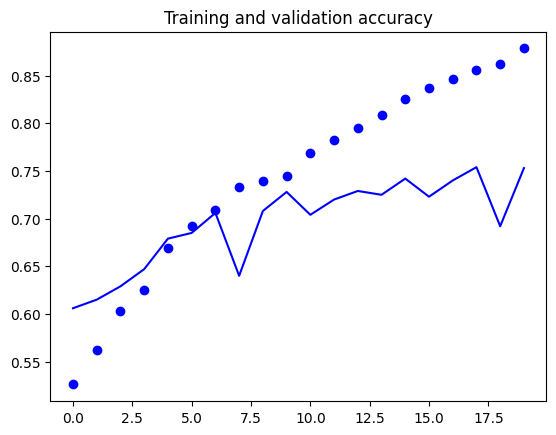

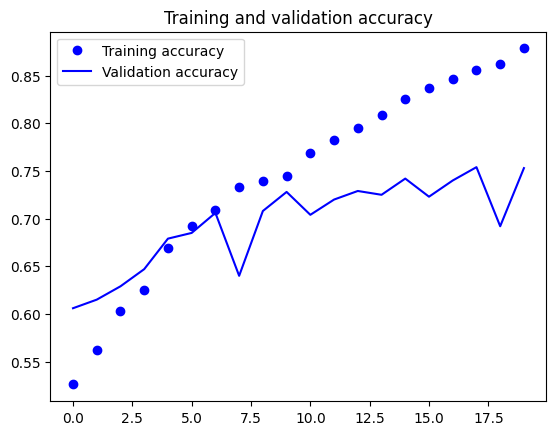

In [8]:
# Train the model without data augmentation
# Plot the training results
history = train_model(20,False)
plot_loss_acc(history)

In [ ]:
# Train the model with data augmentation
# Plot the training results
history = train_model(20,True)
plot_loss_acc(history)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 21s - loss: 0.6916 - accuracy: 0.5025 - val_loss: 0.6926 - val_accuracy: 0.5000 - 21s/epoch - 211ms/step
Epoch 2/20
100/100 - 14s - loss: 0.6830 - accuracy: 0.5465 - val_loss: 0.7156 - val_accuracy: 0.5000 - 14s/epoch - 142ms/step
Epoch 3/20
100/100 - 14s - loss: 0.6758 - accuracy: 0.5670 - val_loss: 0.6495 - val_accuracy: 0.6380 - 14s/epoch - 140ms/step
Epoch 4/20
100/100 - 16s - loss: 0.6644 - accuracy: 0.5765 - val_loss: 0.6389 - val_accuracy: 0.6490 - 16s/epoch - 156ms/step
Epoch 5/20
100/100 - 14s - loss: 0.6578 - accuracy: 0.6015 - val_loss: 0.6279 - val_accuracy: 0.6580 - 14s/epoch - 142ms/step
Epoch 6/20
100/100 - 14s - loss: 0.6434 - accuracy: 0.6215 - val_loss: 0.6078 - val_accuracy: 0.6850 - 14s/epoch - 142ms/step
Epoch 7/20
100/100 - 14s - loss: 0.6305 - accuracy: 0.6450 - val_loss: 0.5925 - val_accuracy: 0.6810 - 14s/epoch - 142ms/step
Epoch 8/20
100/100 - 14s - loss: 0